In [60]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import  confusion_matrix, accuracy_score, classification_report
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [61]:
#load dataset into dataframe
df = pd.read_csv('Social_network_Ads.csv')
display(df)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [62]:
#normalize estimated salary, age
scaler = preprocessing.MinMaxScaler()
df['EstimatedSalary'] = scaler.fit_transform(df[['EstimatedSalary']])
df['Age'] = scaler.fit_transform(df[['Age']])
df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1})
display(df)


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,0.023810,0.029630,0
1,15810944,1,0.404762,0.037037,0
2,15668575,0,0.190476,0.207407,0
3,15603246,0,0.214286,0.311111,0
4,15804002,1,0.023810,0.451852,0
...,...,...,...,...,...
395,15691863,0,0.666667,0.192593,1
396,15706071,1,0.785714,0.059259,1
397,15654296,0,0.761905,0.037037,1
398,15755018,1,0.428571,0.133333,0


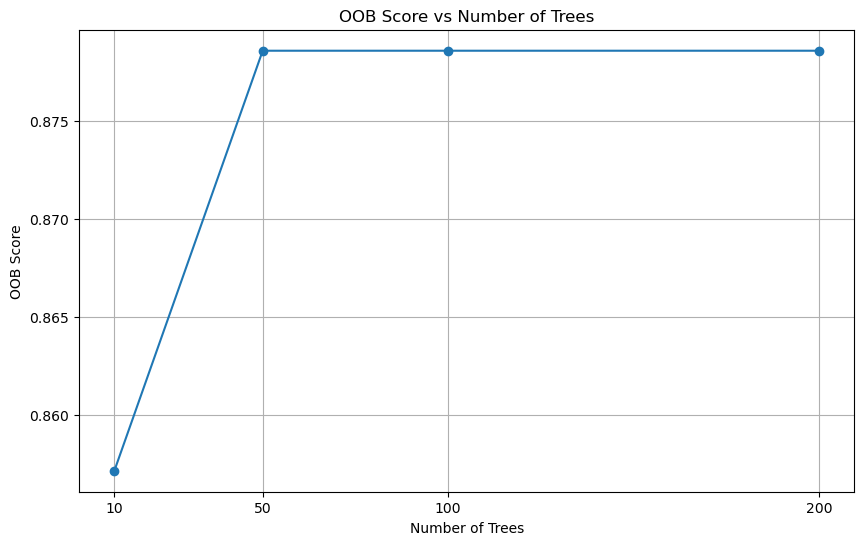

In [63]:
#do random forest with sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
#split into train and test
X = df[['Gender','Age', 'EstimatedSalary']] 
y = df['Purchased']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#compute and plot different number of trees and OOB for n_estimators = 10, 50, 100, 200
oob_scores = []
n_trees = [10, 50, 100, 200]
for n in n_trees:
    rf = RandomForestClassifier(n_estimators=n, oob_score=True, random_state=42)
    rf.fit(X_train, y_train)
    oob_scores.append(rf.oob_score_)

plt.figure(figsize=(10, 6))
plt.plot(n_trees, oob_scores, marker='o')
plt.title('OOB Score vs Number of Trees')
plt.xlabel('Number of Trees')
plt.ylabel('OOB Score')
plt.xticks(n_trees)
plt.grid()
plt.show()

In [64]:
#make a param grid and do grid search for all the options: n_estimators: [50, 100, 200],
#  max_depth: [None, 5, 10, 20], min_samples_split: [2, 5, 10], criterion: ['gini', 'entropy']
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
#output a table of the grid search results
results = pd.DataFrame(grid_search.cv_results_)
display(results)
print("Best parameters found: ", grid_search.best_params_)
print("Best score found: ", grid_search.best_score_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END criterion=gini, max_depth=None, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=None, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=None, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=None, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=None, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=None, min_samples

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.102591,0.011724,0.012845,0.006921,gini,None,2,50,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.910714,0.928571,0.857143,0.803571,0.910714,0.882143,0.046015,47
1,0.194236,0.024178,0.009690,0.002186,gini,None,2,100,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.892857,0.928571,0.857143,0.821429,0.892857,0.878571,0.036422,54
2,0.402423,0.014284,0.024909,0.002477,gini,None,2,200,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.892857,0.928571,0.839286,0.821429,0.892857,0.875000,0.039123,61
3,0.115169,0.027648,0.014013,0.011538,gini,None,5,50,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.928571,0.928571,0.857143,0.821429,0.910714,0.889286,0.042857,21
4,0.217123,0.051762,0.010877,0.006508,gini,None,5,100,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.910714,0.928571,0.857143,0.821429,0.910714,0.885714,0.040089,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,0.288940,0.064773,0.023623,0.019434,entropy,20,5,100,"{'criterion': 'entropy', 'max_depth': 20, 'min...",0.910714,0.928571,0.839286,0.821429,0.910714,0.882143,0.043154,47
68,0.805108,0.040461,0.060762,0.024003,entropy,20,5,200,"{'criterion': 'entropy', 'max_depth': 20, 'min...",0.928571,0.928571,0.839286,0.821429,0.892857,0.882143,0.044607,42
69,0.222774,0.053466,0.015087,0.010825,entropy,20,10,50,"{'criterion': 'entropy', 'max_depth': 20, 'min...",0.928571,0.928571,0.892857,0.821429,0.910714,0.896429,0.039770,8
70,0.299701,0.078663,0.011445,0.004496,entropy,20,10,100,"{'criterion': 'entropy', 'max_depth': 20, 'min...",0.928571,0.928571,0.875000,0.821429,0.928571,0.896429,0.042857,1


Best parameters found:  {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 10, 'n_estimators': 100}
Best score found:  0.8964285714285716


7. The best hyperparameters were {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 10, 'n_estimators': 100}

In [65]:
#retrain the model with the best parameters and pring the final OOB score
best_rf = RandomForestClassifier(criterion="gini", max_depth=None, random_state=42, min_samples_split=10, n_estimators=100, oob_score=True)
best_rf.fit(X_train, y_train)
y_pred = best_rf.predict(X_test)
print("Final OOB Score: ", best_rf.oob_score_)


Final OOB Score:  0.8892857142857142


9. These plots are above

In [66]:
#do logistic regression on the df
from sklearn.linear_model import LogisticRegression
#test it on X and y
list_dicts = []
names = ['Logistic Regression', 'SVM', 'KNN', 'Decision Tree', 'Random Forest']
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
#output the mean accuracy,precision, recall, f1 score
print("Logistic Regression Classification Report: ")
logreg_dict = classification_report(y_test, y_pred_log,output_dict=True)
list_dicts.append(logreg_dict)
print(classification_report(y_test, y_pred_log))


#do the same for SVM (rbf)
from sklearn.svm import SVC 
#test it on X and y
svm = SVC(kernel='rbf', random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
#output the mean accuracy,precision, recall, f1 score
print("SVM Classification Report: ")
svm_dict = classification_report(y_test, y_pred_svm,output_dict=True)
list_dicts.append(svm_dict)
print(classification_report(y_test, y_pred_svm))

#do the same for k-nearest neighbor (k=5)
from sklearn.neighbors import KNeighborsClassifier
#test it on X and y
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
#output the mean accuracy,precision, recall, f1 score
print("KNN Classification Report: ")
knn_dict = classification_report(y_test, y_pred_knn,output_dict=True)
list_dicts.append(knn_dict)
print(classification_report(y_test, y_pred_knn))

#do the same for decision tree
from sklearn.tree import DecisionTreeClassifier
#test it on X and y
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
#output the mean accuracy,precision, recall, f1 score
print("Decision Tree Classification Report: ")
dt_dict = classification_report(y_test, y_pred_dt,output_dict=True)
list_dicts.append(dt_dict)
print(classification_report(y_test, y_pred_dt))

#test best_rf on X and y
best_rf.fit(X_train, y_train)
y_pred_best_rf = best_rf.predict(X_test)
#output the mean accuracy,precision, recall, f1 score
print("Random Forest Classification Report: ")
rf_dict = classification_report(y_test, y_pred_best_rf,output_dict=True)
list_dicts.append(rf_dict)
print(classification_report(y_test, y_pred_best_rf))

#use the dictionaries and create a dataframe with the mean accuracy,precision, recall, f1 score
mean_accuracy = []
mean_precision = []
mean_recall = []
mean_f1 = []
for i in range(len(list_dicts)):
    mean_accuracy.append(list_dicts[i]['accuracy'])
    mean_precision.append(list_dicts[i]['weighted avg']['precision'])
    mean_recall.append(list_dicts[i]['weighted avg']['recall'])
    mean_f1.append(list_dicts[i]['weighted avg']['f1-score'])
#add the mean accuracy,precision, recall, f1 score to the table
output_table = pd.DataFrame({'Model': names, 'Accuracy': mean_accuracy, 'Precision': mean_precision, 'Recall': mean_recall, 'F1-Score': mean_f1})
display(output_table)


Logistic Regression Classification Report: 
              precision    recall  f1-score   support

           0       0.80      0.99      0.88        73
           1       0.97      0.62      0.75        47

    accuracy                           0.84       120
   macro avg       0.88      0.80      0.82       120
weighted avg       0.87      0.84      0.83       120

SVM Classification Report: 
              precision    recall  f1-score   support

           0       0.96      0.95      0.95        73
           1       0.92      0.94      0.93        47

    accuracy                           0.94       120
   macro avg       0.94      0.94      0.94       120
weighted avg       0.94      0.94      0.94       120

KNN Classification Report: 
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        73
           1       0.89      0.89      0.89        47

    accuracy                           0.92       120
   macro avg       0.91     

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.841667,0.865278,0.841667,0.832445
1,SVM,0.941667,0.942014,0.941667,0.941773
2,KNN,0.916667,0.916667,0.916667,0.916667
3,Decision Tree,0.850000,0.850000,0.850000,0.850000
4,Random Forest,0.941667,0.943452,0.941667,0.941957


Based on this you would take RF and SVM and do hyperparam tuning o find the best one